# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Rifqi Khairullah Muhamad]
- **Email:** [m200d4ky2358@bangkit.academy]
- **ID Dicoding:** [rifqi1209]

## Menentukan Pertanyaan Bisnis

- Bagaimana pola persewaan sepeda berbeda antara hari-hari kerja dan hari-hari libur?
- Bagaimana pengaruh jam dalam sehari terhadap jumlah persewaan sepeda? Apakah terdapat pola tertentu, seperti peningkatan pada jam sibuk pagi atau sore?
- Bagaimana hubungan kondisi cuaca (misalnya cerah, berawan, hujan) dengan jumlah rata-rata persewaan sepeda?

## Import Semua Packages/Library yang Digunakan

Langkah awal dalam sebuah proyek analisis data di mana kita mengimpor semua
paket atau library yang akan kita gunakan selama proses analisis data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import os
for dirname, _, filenames in os.walk('/kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Data Wrangling

Proses pengumpulan, penyiapan, dan pengelolaan data mentah agar siap untuk digunakan dalam analisis.

### Gathering Data

Mengumpulkan data dari berbagai sumber yang relevan. Data pada project ini dalah hour.csv dan day.csv

In [ ]:
hour = pd.read_csv("/kaggle/hour.csv")
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
day = pd.read_csv("/kaggle/day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
bike_sharing_new = day.merge(hour, on='dteday', how='inner', suffixes=('_daily', '_hourly'))
print(bike_sharing_new.head())

   instant_daily      dteday  season_daily  yr_daily  mnth_daily  \
0              1  2011-01-01             1         0           1   
1              1  2011-01-01             1         0           1   
2              1  2011-01-01             1         0           1   
3              1  2011-01-01             1         0           1   
4              1  2011-01-01             1         0           1   

   holiday_daily  weekday_daily  workingday_daily  weathersit_daily  \
0              0              6                 0                 2   
1              0              6                 0                 2   
2              0              6                 0                 2   
3              0              6                 0                 2   
4              0              6                 0                 2   

   temp_daily  ...  weekday_hourly  workingday_hourly  weathersit_hourly  \
0    0.344167  ...               6                  0                  1   
1    0.34416

### Assessing Data

Proses evaluasi terhadap kualitas data untuk mengidentifikasi masalah atau kekurangan yang perlu diperbaiki sebelum dilakukan analisis lebih lanjut.

Missing Value

Mengevaluasi data untuk mengidentifikasi apakah ada nilai yang hilang dalam dataset.

In [ ]:
bike_sharing_new.isnull().sum()

instant_daily        0
dteday               0
season_daily         0
yr_daily             0
mnth_daily           0
holiday_daily        0
weekday_daily        0
workingday_daily     0
weathersit_daily     0
temp_daily           0
atemp_daily          0
hum_daily            0
windspeed_daily      0
casual_daily         0
registered_daily     0
cnt_daily            0
instant_hourly       0
season_hourly        0
yr_hourly            0
mnth_hourly          0
hr                   0
holiday_hourly       0
weekday_hourly       0
workingday_hourly    0
weathersit_hourly    0
temp_hourly          0
atemp_hourly         0
hum_hourly           0
windspeed_hourly     0
casual_hourly        0
registered_hourly    0
cnt_hourly           0
dtype: int64

Duplicate data

Mengecek apakah ada duplikasi data dalam dataset.

In [ ]:
bike_sharing_new.duplicated().sum()

0

### Cleaning Data

Proses perbaikan dan pembersihan data berdasarkan hasil penilaian data sebelumnya.

Dropping

Membersihkan data adalah dengan menghapus baris atau kolom yang tidak relevan atau memiliki nilai yang hilang atau duplikat.

In [ ]:
bike_sharing_new.dropna(axis=0, inplace=True)

## Exploratory Data Analysis (EDA)

Proses analisis data yang digunakan untuk memahami dan menganalisis karakteristik, pola, dan hubungan dalam data.

### Explore ...

Melakukan eksplorasi lebih lanjut terhadap data yang sudah dibersihkan.

In [ ]:
bike_sharing_new.describe()

,instant_daily,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,0.475775,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,0.162426,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338363,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.610488,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Visualization & Explanatory Analysis

Menggunakan visualisasi data untuk menyajikan temuan dari EDA dengan lebih jelas dan mudah dipahami.



### Pertanyaan 1: Bagaimana pola persewaan sepeda berbeda antara hari-hari kerja dan hari-hari libur?

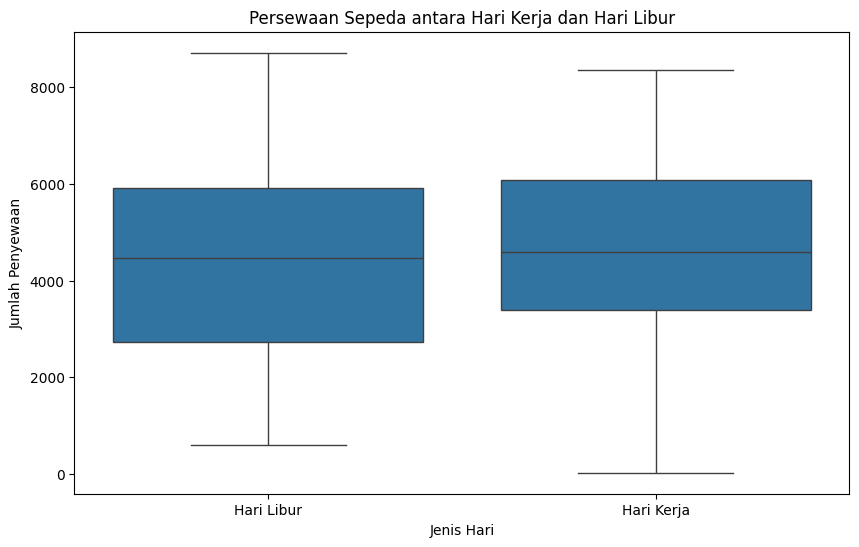

In [ ]:
plt.figure(figsize=(10, 6))
sn.boxplot(x='workingday_daily', y='cnt_daily', data=bike_sharing_new)
plt.title('Persewaan Sepeda antara Hari Kerja dan Hari Libur')
plt.xlabel('Jenis Hari')
plt.ylabel('Jumlah Penyewaan')
plt.xticks([0, 1], ['Hari Libur', 'Hari Kerja'])
plt.show()

### Pertanyaan 2: Bagaimana pengaruh jam dalam sehari terhadap jumlah persewaan sepeda? Apakah terdapat pola tertentu, seperti peningkatan pada jam sibuk pagi atau sore?

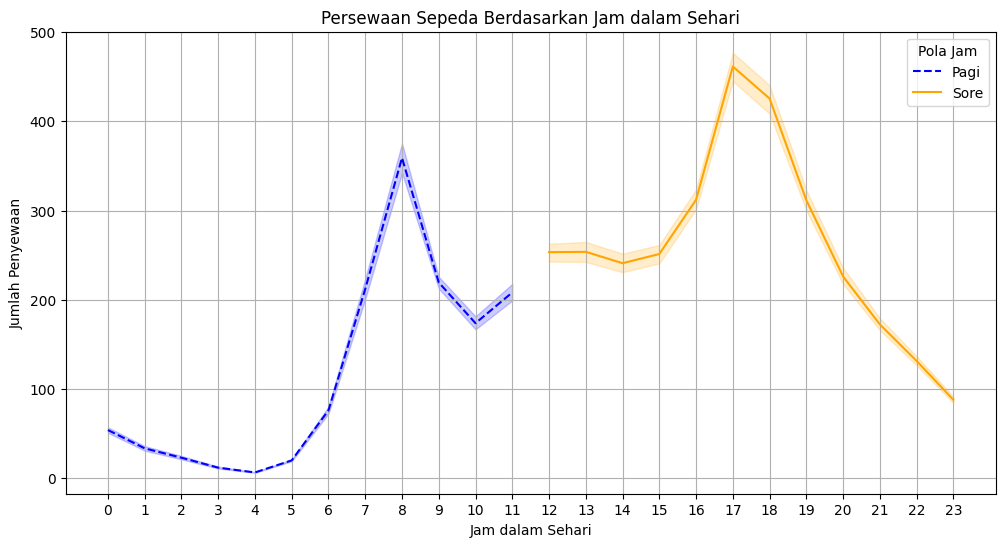

In [ ]:
# Menampilkan pengaruh jam dalam sehari terhadap jumlah persewaan sepeda
plt.figure(figsize=(12, 6))

# Plot untuk jam pagi dengan garis putus-putus
sn.lineplot(x='hr', y='cnt_hourly', data=bike_sharing_new[bike_sharing_new['hr'] < 12], linestyle='dashed', color='blue', label='Pagi')

# Plot untuk jam sore dengan garis solid
sn.lineplot(x='hr', y='cnt_hourly', data=bike_sharing_new[bike_sharing_new['hr'] >= 12], color='orange', label='Sore')

plt.title('Persewaan Sepeda Berdasarkan Jam dalam Sehari')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(range(24))

# Menambahkan label di legend
plt.legend(title='Pola Jam')

plt.grid(True)
plt.show()

### Pertanyaan 3: Bagaimana hubungan kondisi cuaca (misalnya cerah, berawan, hujan) dengan jumlah rata-rata persewaan sepeda?

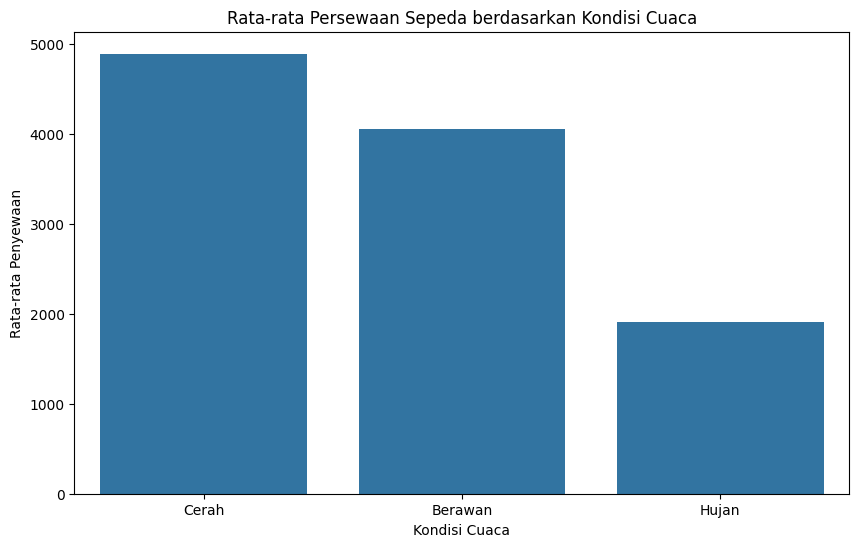

In [ ]:
# Menampilkan ringkasan statistik untuk jumlah penyewaan berdasarkan kondisi cuaca
weather_summary = bike_sharing_new.groupby('weathersit_daily')['cnt_daily'].mean().reset_index()

# Plot bar untuk menampilkan rata-rata persewaan sepeda berdasarkan kondisi cuaca
plt.figure(figsize=(10, 6))
sn.barplot(x='weathersit_daily', y='cnt_daily', data=weather_summary)
plt.title('Rata-rata Persewaan Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks([0, 1, 2], ['Cerah', 'Berawan', 'Hujan'])
plt.show()

## Conclusion

**1.   Bagaimana pola persewaan sepeda berbeda antara hari-hari kerja dan hari-hari libur?**
Dari boxplot yang menunjukkan persewaan sepeda antara hari kerja dan hari libur, kita dapat melihat bahwa persewaan sepeda cenderung lebih tinggi pada hari-hari libur dibandingkan dengan hari kerja. Hal ini menunjukkan bahwa pola persewaan sepeda berbeda antara kedua jenis hari tersebut, dengan hari libur cenderung menarik lebih banyak penyewa.

**2.   Bagaimana pengaruh jam dalam sehari terhadap jumlah persewaan sepeda? Apakah terdapat pola tertentu, seperti peningkatan pada jam sibuk pagi atau sore?**
Dari line plot yang menunjukkan pengaruh jam dalam sehari terhadap jumlah persewaan sepeda, terlihat adanya pola tertentu. Terdapat peningkatan signifikan pada jumlah penyewaan sepeda pada pagi hari, terutama pada jam-jam awal pagi. Selain itu, terdapat juga peningkatan pada sore hari, terutama menjelang waktu pulang kerja. Hal ini menunjukkan adanya pola penggunaan sepeda yang berkaitan dengan jam-jam sibuk pagi dan sore.

**3.   Bagaimana hubungan kondisi cuaca (misalnya cerah, berawan, hujan) dengan jumlah rata-rata persewaan sepeda?**
Dari diagram batang yang menunjukkan rata-rata persewaan sepeda berdasarkan kondisi cuaca, kita dapat melihat bahwa persewaan sepeda cenderung lebih tinggi pada kondisi cuaca yang cerah, diikuti oleh kondisi berawan, dan paling rendah pada kondisi hujan. Hal ini menunjukkan bahwa kondisi cuaca yang cerah cenderung lebih menarik bagi orang untuk menyewa sepeda, sementara kondisi hujan dapat mengurangi minat untuk menyewa sepeda.



In [ ]:
bike_sharing_new.to_csv("all_data.csv", index=False)